# Projeto de Filtro FIR Passa-Baixa com Janela de Kaiser

## Introdução

Filtros FIR (Finite Impulse Response) são amplamente utilizados devido à sua estabilidade e fase linear. Neste trabalho, projetamos um filtro FIR passa-baixa usando o método da janela de Kaiser, garantindo:

- Atenuação na banda rejeitada ≥ 50 dB
- Frequência de corte: ωc = π/2
- Região de transição: Δω < 0,1π

Para isso, empregamos a biblioteca SciPy para calcular a resposta do filtro e suas transformações.

## Filtro FIR Passa-Baixa

O filtro será projetado pelo método da janela, usando a janela de Kaiser, que permite controlar a transição e atenuação com o parâmetro β.

### Cálculo do Parâmetro β

O valor de β depende da atenuação desejada:

In [21]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parâmetros do filtro
atenuacao_desejada = 50  # dB
frequencia_corte = np.pi / 2  # ωc = π/2
largura_transicao = 0.1 * np.pi  # Δω < 0,1π

# Cálculo do parâmetro β
beta = signal.kaiser_beta(atenuacao_desejada)

print(f"Parâmetro β calculado: {beta}")

Parâmetro β calculado: 4.533514120981248


### Projeto do Filtro

Com o valor de β calculado, podemos projetar o filtro FIR passa-baixa usando a janela de Kaiser. A seguir, apresentamos o código para projetar o filtro e plotar sua resposta em frequência.

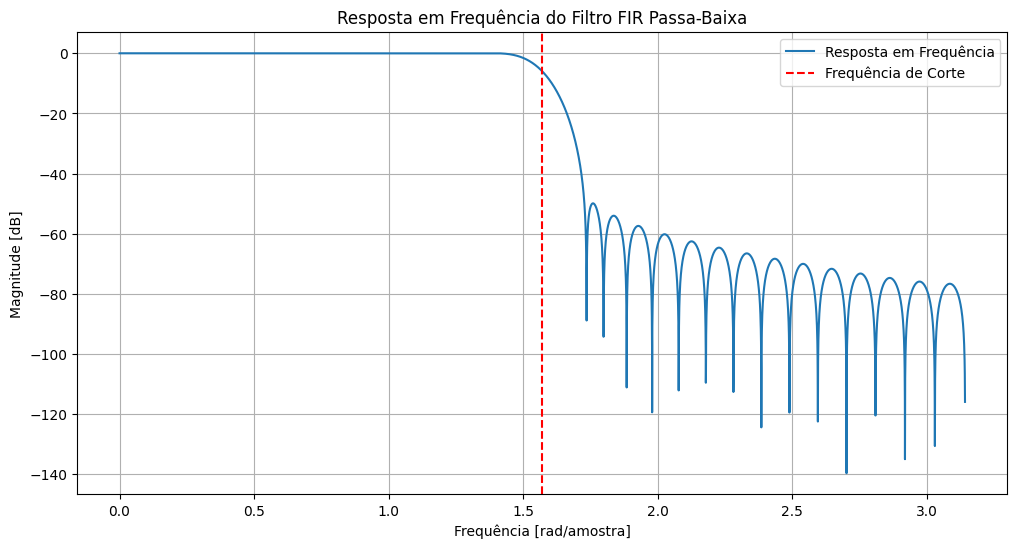

In [22]:
# Projeto do filtro FIR passa-baixa usando a janela de Kaiser
# A função kaiserord retorna uma tupla: (numtaps, beta)
params = signal.kaiserord(atenuacao_desejada, largura_transicao / np.pi)
numtaps, _ = signal.kaiserord(atenuacao_desejada, largura_transicao / np.pi)

# Projeta o filtro FIR
taps = signal.firwin(numtaps, frequencia_corte/np.pi, window=('kaiser', beta), scale=False)

# Resposta em frequência do filtro
frequencias, resposta = signal.freqz(taps, worN=8000)

# Plot da resposta em frequência
plt.figure(figsize=(12, 6))
plt.plot(frequencias, 20 * np.log10(np.abs(resposta)), label='Resposta em Frequência')
plt.title('Resposta em Frequência do Filtro FIR Passa-Baixa')
plt.xlabel('Frequência [rad/amostra]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axvline(frequencia_corte, color='red', linestyle='--', label='Frequência de Corte')
plt.legend()
plt.show()

### Implementação nas Formas Direta e em Cascata

A *forma direta* utiliza os coeficientes do filtro diretamente. Vamos quantizar os coeficientes para estudar a sensibilidade à quantização.

A *forma em cascata* decompõe o filtro em seções de segunda ordem (SOS). Vamos usar a função tf2sos da SciPy para converter a forma direta em cascata.

In [23]:
from scipy.signal import tf2sos

# Forma direta
print("Coeficientes da forma direta (precisão infinita):")
print(taps)

# Quantização dos coeficientes (exemplo: 4 casas decimais)
taps_quantizados = np.round(taps, decimals=4)
print("\nCoeficientes da forma direta (quantizados):")
print(taps_quantizados)

# Forma em cascata
sos = tf2sos(taps, 1)  # Converte para seções de segunda ordem (SOS)
print("\nCoeficientes da forma em cascata (precisão infinita):")
print(sos)

# Quantização dos coeficientes da forma em cascata
sos_quantizados = np.round(sos, decimals=4)
print("\nCoeficientes da forma em cascata (quantizados):")
print(sos_quantizados)

Coeficientes da forma direta (precisão infinita):
[ 4.23762209e-04  6.02198652e-04 -8.16057159e-04 -1.06930606e-03
  1.36620371e-03  1.71134743e-03 -2.10974070e-03 -2.56688439e-03
  3.08890004e-03  3.68269628e-03 -4.35619355e-03 -5.11862922e-03
  5.98097465e-03  6.95651129e-03 -8.06163671e-03 -9.31701094e-03
  1.07492180e-02  1.23932302e-02 -1.42961620e-02 -1.65231714e-02
  1.91670887e-02  2.23648412e-02 -2.63270122e-02 -3.13946767e-02
  3.81582270e-02  4.77346115e-02 -6.25198094e-02 -8.87471950e-02
  1.49279269e-01  4.49899875e-01  4.49899875e-01  1.49279269e-01
 -8.87471950e-02 -6.25198094e-02  4.77346115e-02  3.81582270e-02
 -3.13946767e-02 -2.63270122e-02  2.23648412e-02  1.91670887e-02
 -1.65231714e-02 -1.42961620e-02  1.23932302e-02  1.07492180e-02
 -9.31701094e-03 -8.06163671e-03  6.95651129e-03  5.98097465e-03
 -5.11862922e-03 -4.35619355e-03  3.68269628e-03  3.08890004e-03
 -2.56688439e-03 -2.10974070e-03  1.71134743e-03  1.36620371e-03
 -1.06930606e-03 -8.16057159e-04  6.0219

### Análise da Sensibilidade à Quantização
Vamos comparar a resposta em frequência do filtro com precisão infinita e com precisão finita

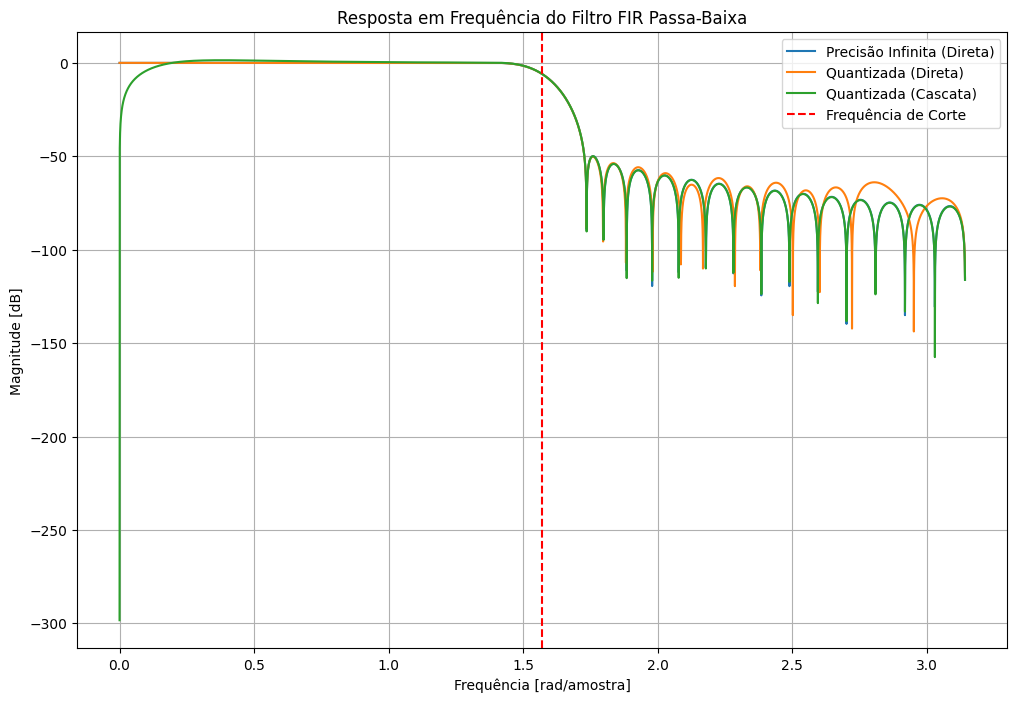

In [24]:
# Resposta em frequência para a forma direta quantizada
_, resposta_quantizada = signal.freqz(taps_quantizados, worN=8000)

# Resposta em frequência para a forma em cascata quantizada
_, resposta_cascata_quantizada = signal.sosfreqz(sos_quantizados, worN=8000)

# Plot das respostas em frequência
plt.figure(figsize=(12, 8))
plt.plot(frequencias, 20 * np.log10(np.abs(resposta)), label='Precisão Infinita (Direta)')
plt.plot(frequencias, 20 * np.log10(np.abs(resposta_quantizada)), label='Quantizada (Direta)')
plt.plot(frequencias, 20 * np.log10(np.abs(resposta_cascata_quantizada)), label='Quantizada (Cascata)')
plt.title('Resposta em Frequência do Filtro FIR Passa-Baixa')
plt.xlabel('Frequência [rad/amostra]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axvline(frequencia_corte, color='red', linestyle='--', label='Frequência de Corte')
plt.legend()
plt.show()

### Transformações em frequência


C:\Users\joser\AppData\Local\Temp\ipykernel_16864\2843998229.py:28: RuntimeWarning: divide by zero encountered in log10
  plt.plot(frequencias, 20 * np.log10(np.abs(resposta_transformada)), label=nome)


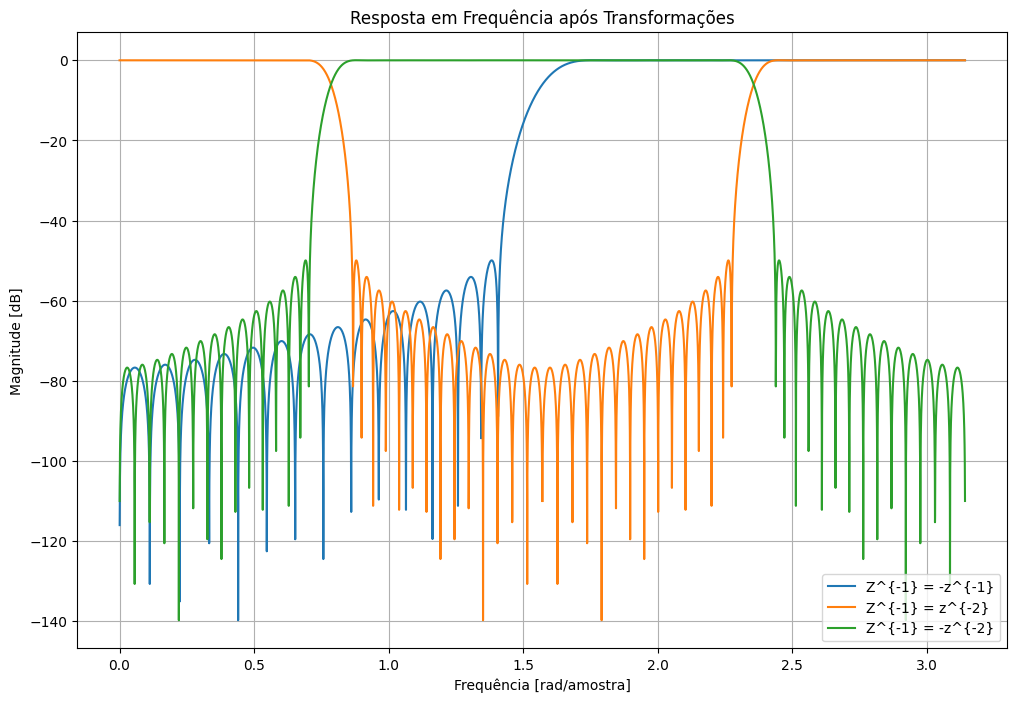

In [25]:
# Função para aplicar transformações em frequência
def transformar_filtro(taps, transformacao):
    if transformacao == 1:
        # Z^{-1} = -z^{-1}
        return taps * (-1) ** np.arange(len(taps))
    elif transformacao == 2:
        # Z^{-1} = z^{-2}
        novos_taps = np.zeros(2 * len(taps) - 1)
        novos_taps[::2] = taps
        return novos_taps
    elif transformacao == 3:
        # Z^{-1} = -z^{-2}
        novos_taps = np.zeros(2 * len(taps) - 1)
        novos_taps[::2] = taps * (-1) ** np.arange(len(taps))
        return novos_taps

# Aplicando as transformações
transformacoes = [
    ("Z^{-1} = -z^{-1}", 1),
    ("Z^{-1} = z^{-2}", 2),
    ("Z^{-1} = -z^{-2}", 3)
]

plt.figure(figsize=(12, 8))
for nome, transformacao in transformacoes:
    taps_transformados = transformar_filtro(taps, transformacao)
    _, resposta_transformada = signal.freqz(taps_transformados, worN=8000)
    plt.plot(frequencias, 20 * np.log10(np.abs(resposta_transformada)), label=nome)

plt.title('Resposta em Frequência após Transformações')
plt.xlabel('Frequência [rad/amostra]')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.legend()
plt.show()

### Resultados
